In [29]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [30]:
#Define the satate

class BatsmanState(TypedDict):

    runs: int
    balls: int
    n_fours: int
    n_sixes: int
    strike_rate: float
    bpb: float
    boundary_percentage: float
    


In [31]:
def calculate_sr(state: BatsmanState) -> BatsmanState:
    ball=state["balls"]
    run=state["runs"]
    if ball==0:
        state["strike_rate"]=0.0
    else:
        state["strike_rate"]=(run/ball)*100
    return {"strike_rate":state["strike_rate"]}

In [39]:
def calculate_bpb(state: BatsmanState) -> BatsmanState:
    ball=state["balls"]
    fours=state["n_fours"]
    sixes=state["n_sixes"]
    total_boundaries=fours+sixes
    if ball==0:
        state["bpb"]=0.0
    else:
        state["bpb"]=ball/total_boundaries
    return { "bpb":state["bpb"] }

In [ ]:
def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
    runs=state["runs"]
    fours=state["n_fours"]
    sixes=state["n_sixes"]
    boundary_runs=(fours*4)+(sixes*6)
    if runs==0:
        state["boundary_percentage"]=0.0
    else:
        state["boundary_percentage"]=(boundary_runs/runs)*100
    return {"boundary_percentage":state["boundary_percentage"]}

In [41]:
def summary(state: BatsmanState) -> str:
    summary=f"""Runs: {state['runs']}, Balls: {state['balls']}, Fours: {state['n_fours']}, Sixes: {state['n_sixes']},
            Strike Rate: {state['strike_rate']:.2f}, BPB: {state['bpb']:.2f}, Boundary %: {state['boundary_percentage']:.2f}"
         """
    
    
    state["summary"]=summary
    return {"summary":state["summary"]}


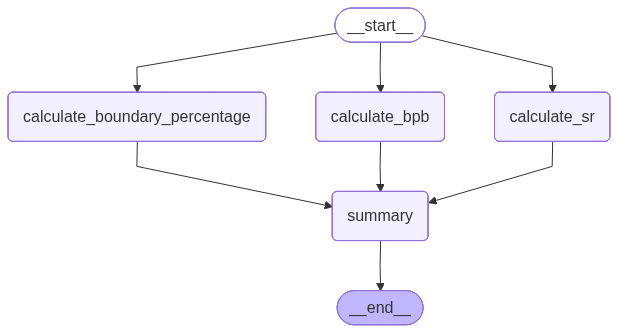

In [40]:
# define the graph
graph=StateGraph(BatsmanState)
# add the nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percentage',calculate_boundary_percentage)
graph.add_node('summary',summary)

# add the edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percentage')
graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary_percentage','summary')
graph.add_edge('summary',END)

workflow=graph.compile()
workflow

In [42]:
initial_state={
    "runs":150,
    "balls":120,
    "n_fours":15,
    "n_sixes":5,
    
}

In [43]:
workflow.invoke(initial_state)


{'runs': 150,
 'balls': 120,
 'n_fours': 15,
 'n_sixes': 5,
 'strike_rate': 125.0,
 'bpb': 6.0,
 'boundary_percentage': 60.0}